<a href="https://colab.research.google.com/github/Robertkevin96/cs480student/blob/main/Copy_of_CS480_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

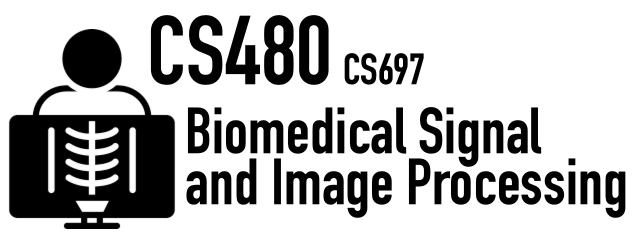
#Assignment 5

In [ ]:
# In this assignment, we will visualize and explore a CT scan!

In [10]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
# we are using pydicom, so lets install it!
!pip install pydicom

     |████████████████████████████████| 2.0 MB 4.2 MB/s 


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [ ]:
# Please download https://cs480.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [ ]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [ ]:
There are 220 slices.

In [ ]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [ ]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

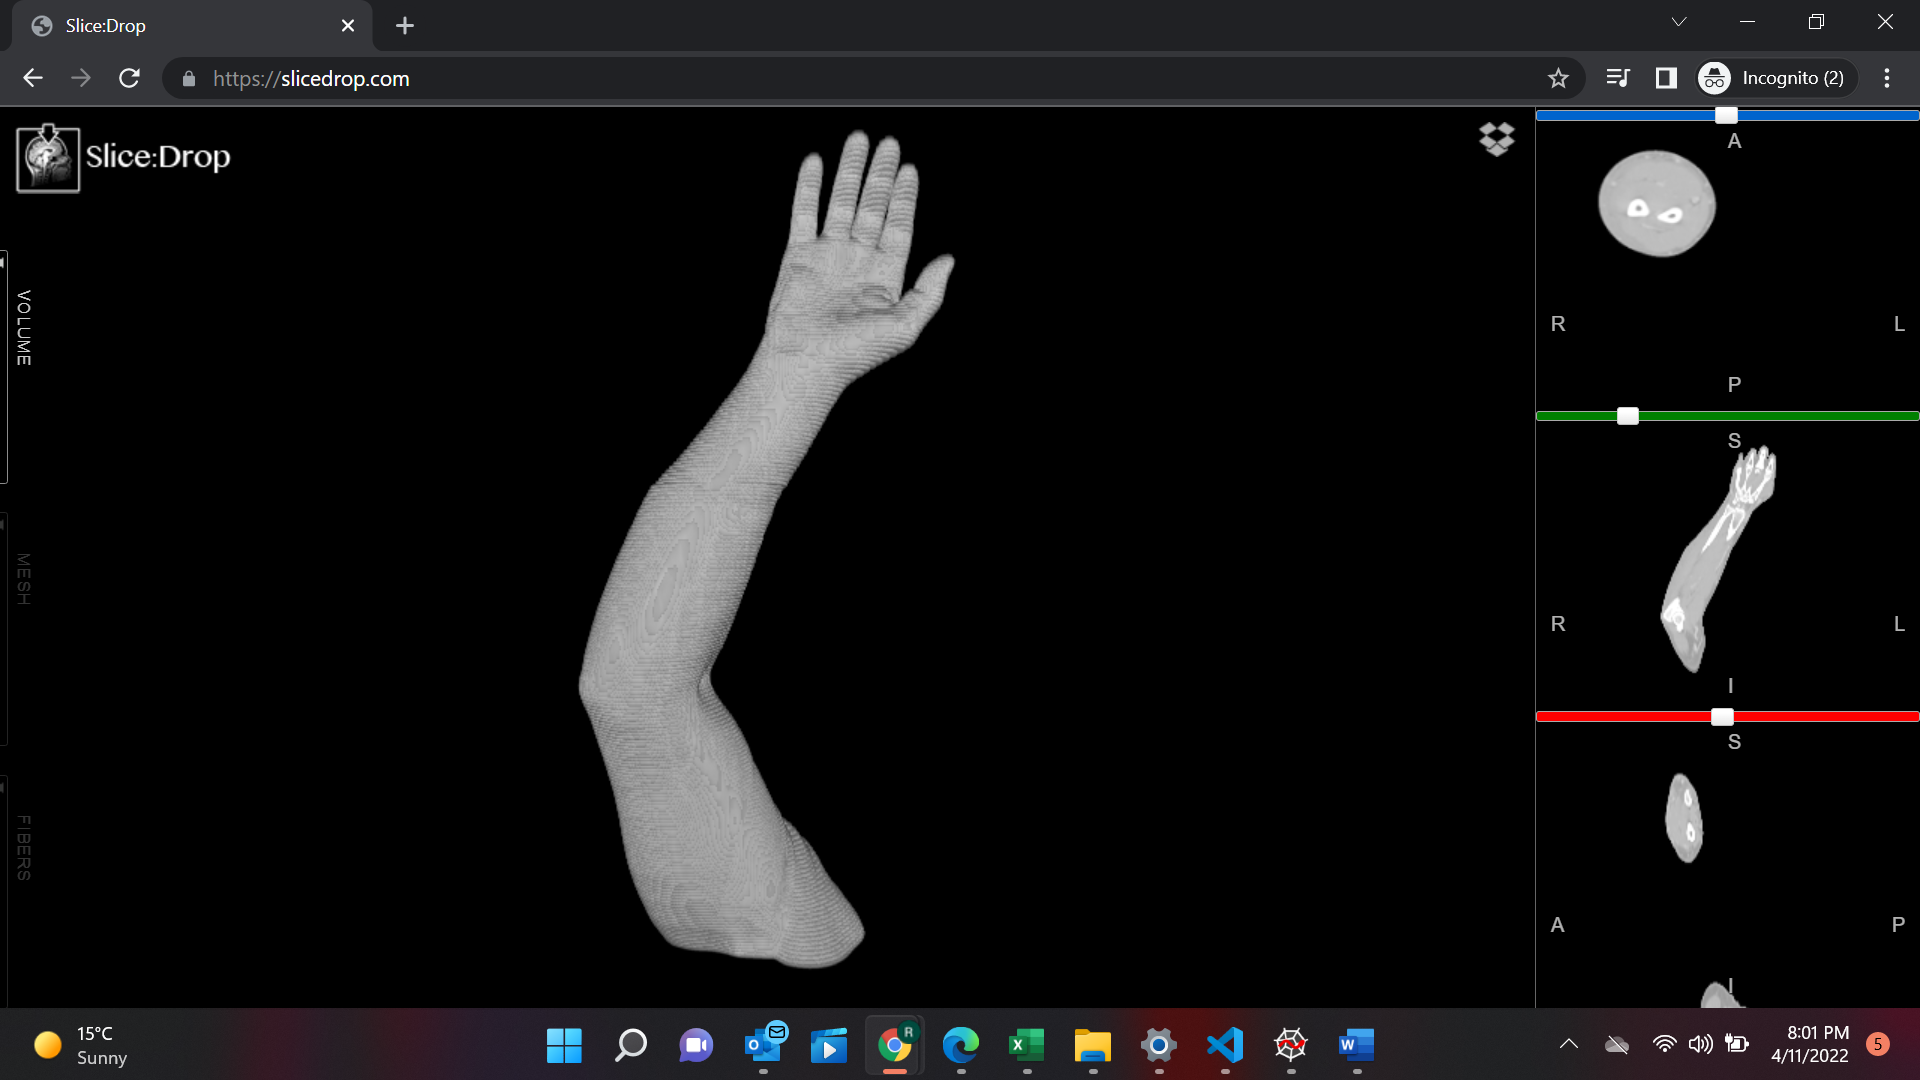

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [ ]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [13]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [ ]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [14]:
from pydicom import dcmread


In [ ]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY

In [40]:
import os
import matplotlib.pyplot as plt
ctfiles = sorted(os.listdir('ct'))
ctfiles.sort()
dcm_file_0 = dcmread('ct/{}'.format(ctfiles[0]))
data_shape = list(dcm_file_0.pixel_array.shape)
data_shape.append(220)
data_shape
ct_data = np.zeros(data_shape)
for i, j in enumerate(ctfiles):
  ct_data[:,:,i] =  dcmread('ct/{}'.format(j)).pixel_array
ct_data.shape


(454, 512, 220)

In [ ]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

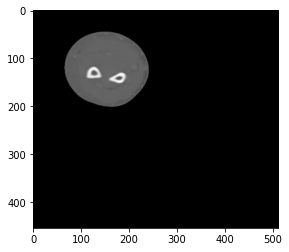

In [16]:
# TODO: YOUR CODE FOR AXIAL
plt.imshow(ct_data[:, :, data_shape[2]//2], cmap='gray')

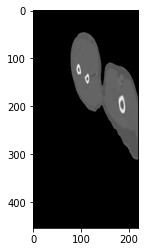

In [17]:
# TODO: YOUR CODE FOR SAGITTAL
plt.imshow(ct_data[:,data_shape[1]//3,:], cmap='gray')


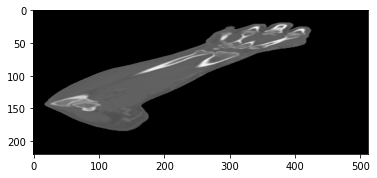

In [18]:
# TODO: YOUR CODE FOR CORONAL
plt.imshow(ct_data[data_shape[0]//4,:,:].T, cmap='gray')

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [ ]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [ ]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

In [31]:
l=dcm_file_0['WindowCenter'].value
print(l)


30


In [32]:
w=dcm_file_0['WindowWidth'].value 
print(w)


410


In [44]:
r=dcm_file_0['RescaleIntercept'].value
print(r)

-1024


In [33]:
vmin = l - w/2
vmax = l + w/2
print(vmin)
print(vmax)


-175.0
235.0


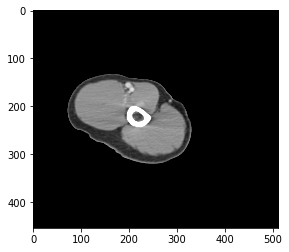

In [45]:
image_slice = dcmread('ct/' + ctfiles[200])
hu_pixels = image_slice.pixel_array
plt.imshow(hu_pixels + r, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [ ]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

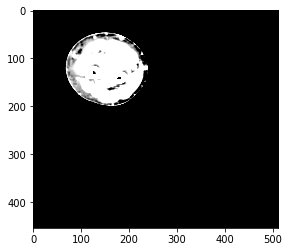

In [52]:
l=0
w=70
plt.imshow(ct_data[:,:,data_shape[2]//2] + r, cmap='gray', vmin=(l - w // 2), vmax=(l + w // 2))

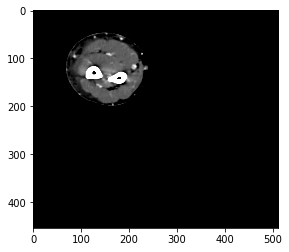

In [53]:
l=80
w=170
plt.imshow(ct_data[:,:,data_shape[2]//2] + r, cmap='gray', vmin=(l - w // 2), vmax=(l + w // 2))

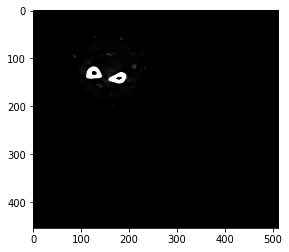

In [54]:
l=300
w=500
plt.imshow(ct_data[:,:,data_shape[2]//2] + r, cmap='gray', vmin=(l - w // 2), vmax=(l + w // 2))

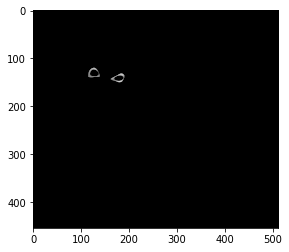

In [55]:
l=1500
w=700
plt.imshow(ct_data[:,:,data_shape[2]//2] + r, cmap='gray', vmin=(l - w // 2), vmax=(l + w // 2))

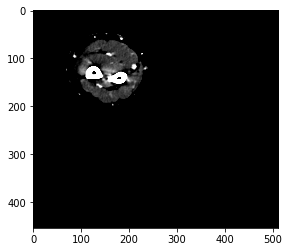

In [56]:
l=80
w=80
plt.imshow(ct_data[:,:,data_shape[2]//2] + r, cmap='gray', vmin=(l - w // 2), vmax=(l + w // 2))

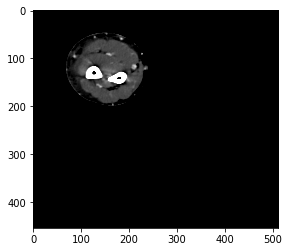

In [57]:
l=100
w=200
plt.imshow(ct_data[:,:,data_shape[2]//2] + r, cmap='gray', vmin=(l - w // 2), vmax=(l + w // 2))

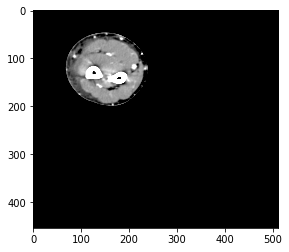

In [63]:
l=40
w=150
plt.imshow(ct_data[:,:,data_shape[2]//2] + r, cmap='gray', vmin=(l - w // 2), vmax=(l + w // 2))

In [ ]:
# Which values make sense and why?

I Believe  value of window 150 and level 40 gives a clear view of visualization as it is not too dark and not too bright. 

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [ ]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

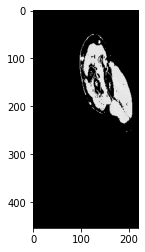

In [65]:
# TODO: YOUR CODE TO SEGMENT FAT
new_mask=(ct_data.copy()).astype(int16)
new_mask[new_mask < 1058] = 0
new_mask[new_mask > 1200] = 0
plt.imshow(new_mask[:, 100, :], cmap='gray')
plt.show()

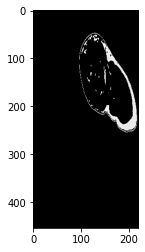

In [75]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE
new_mask=(ct_data.copy()).astype(int16)
new_mask[new_mask > 1000] = 0
plt.imshow(new_mask[:, 100, :], cmap='gray')
plt.show()

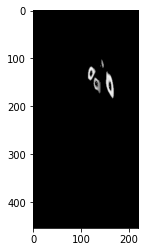

In [69]:
# TODO: YOUR CODE TO SEGMENT BONES
new_mask=(ct_data.copy()).astype(int16)
new_mask[new_mask < 1200] = 0
plt.imshow(new_mask[:, 100, :], cmap='gray')
plt.show()

In [ ]:
# Are the segmentations good?

Segmentation can be seen clearly but i believe replacing different value can give for accuracy for the visualization. 

In [ ]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""